In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [2]:
from sklearn.datasets import load_boston

data = load_boston()
input_df = pd.DataFrame(data=data['data'], columns=data['feature_names'])

In [3]:
target = pd.Series(data=data['target'], name='target')

In [4]:
import xgboost

model = xgboost.XGBRegressor(objective='reg:squarederror')
model = model.fit(input_df.values, target.values)

In [5]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(input_df.values)
train_error = mean_squared_error(target.values, predictions)
print('Train Error: {:.4f}'.format(train_error))

Train Error: 2.3667


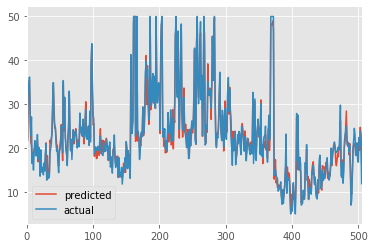

In [6]:
pred_df = pd.DataFrame(data=np.column_stack([predictions, target.values]), columns=['predicted', 'actual'])

pred_df.plot()

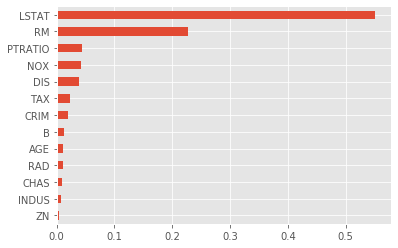

In [7]:
importances = pd.Series(data=model.feature_importances_, index=input_df.columns).sort_values()
importances.plot(kind='barh')

In [8]:
from mlflow.sklearn import save_model, log_model
from mlflow import log_artifacts
import shutil
import os
import mlflow

mlflow.set_experiment('boston_housing')


model_path = '/srv/model/output/boston_housing'
if os.path.exists(model_path):
    shutil.rmtree(model_path)
    

with mlflow.start_run():
    mlflow.log_metric('data_rows', input_df.shape[0])
    mlflow.log_metric('feature_count', input_df.shape[1])
    mlflow.log_metric('train_error', train_error)
    save_model(model, model_path)
    log_model(model, os.path.basename(model_path))
    print("Artifact repo is {}".format(mlflow.get_artifact_uri()))
    log_artifacts(model_path)

Artifact repo is s3://mlflow-regression/1/2c6c6854a4664d9687bb2e99e387e463/artifacts


/home/admin/misc/anaconda3/envs/mlflow-b594cad6e8f0115f9cc5c4b1c344c9935c7d54a0/lib/python3.7/site-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
